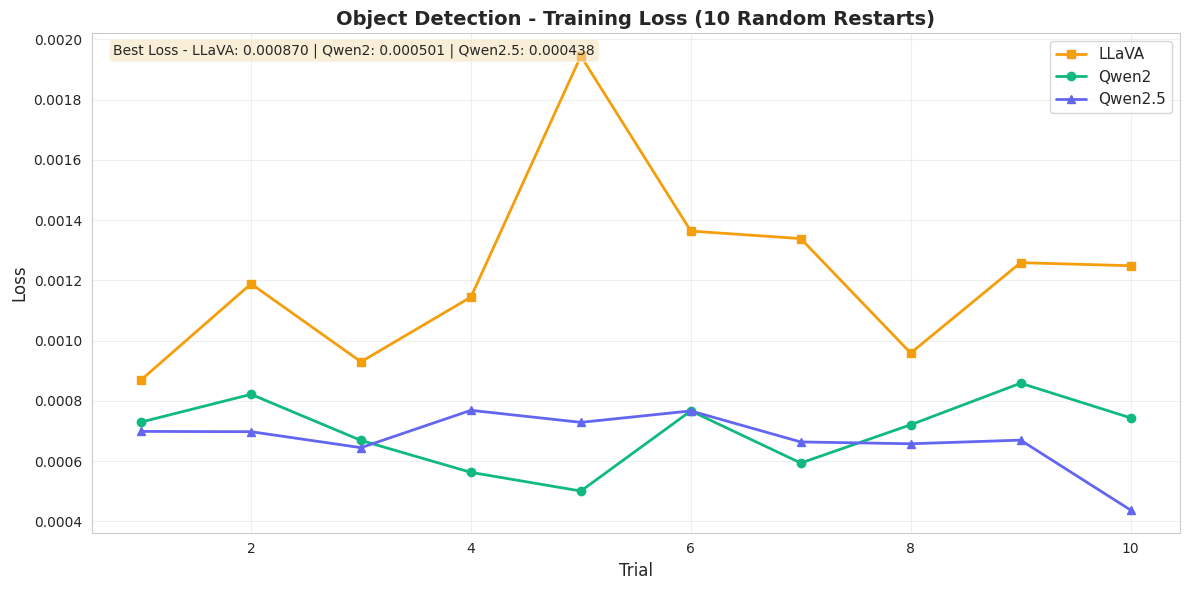

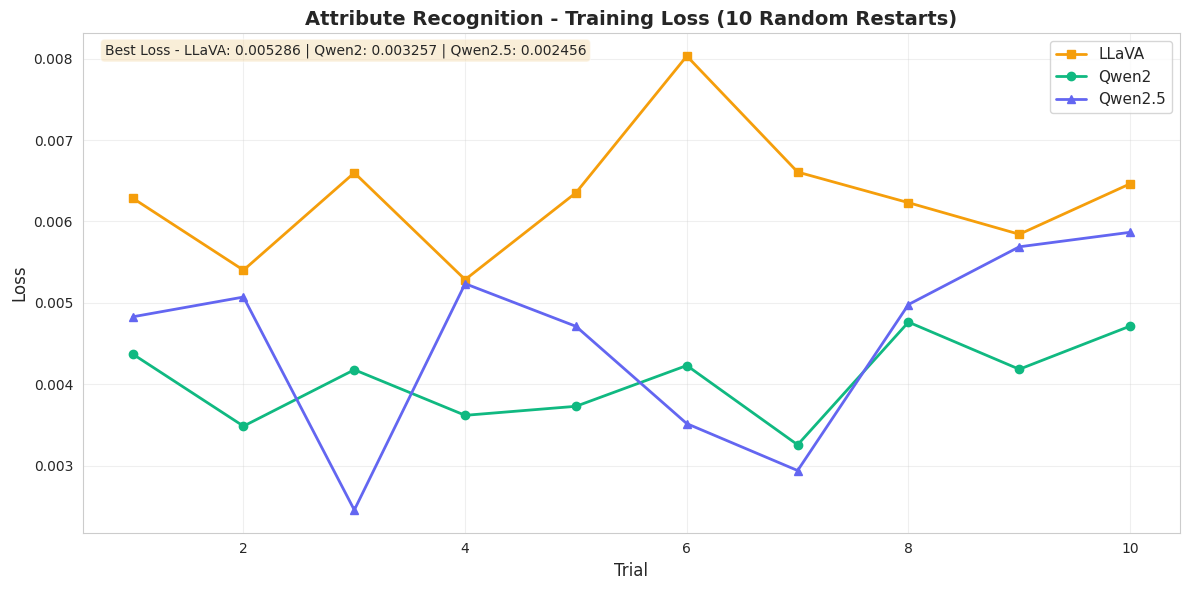

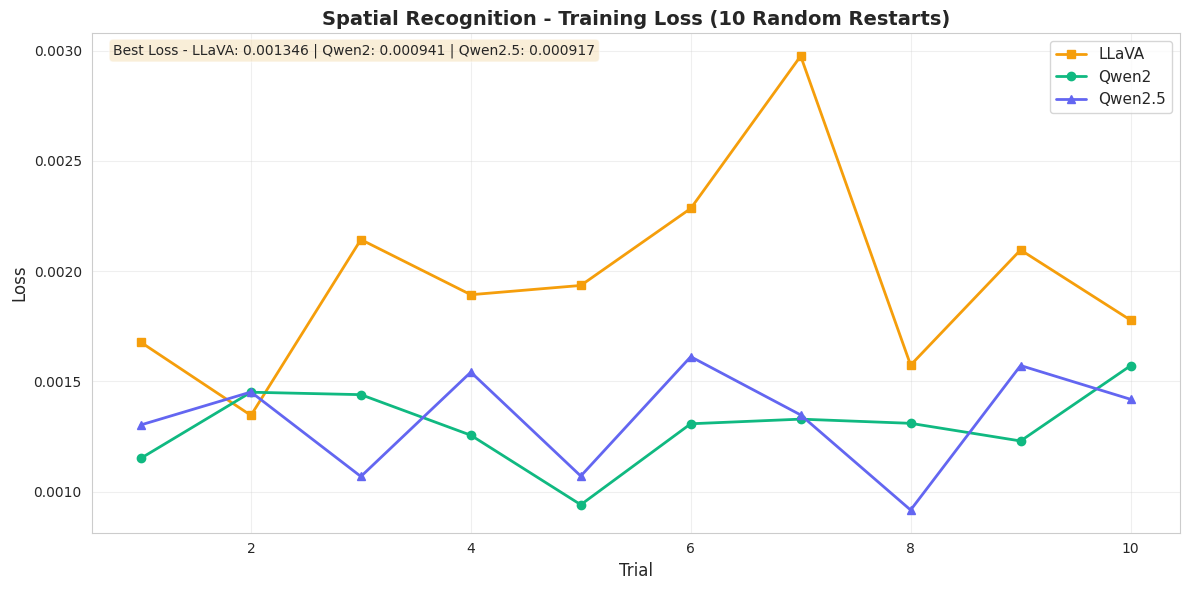

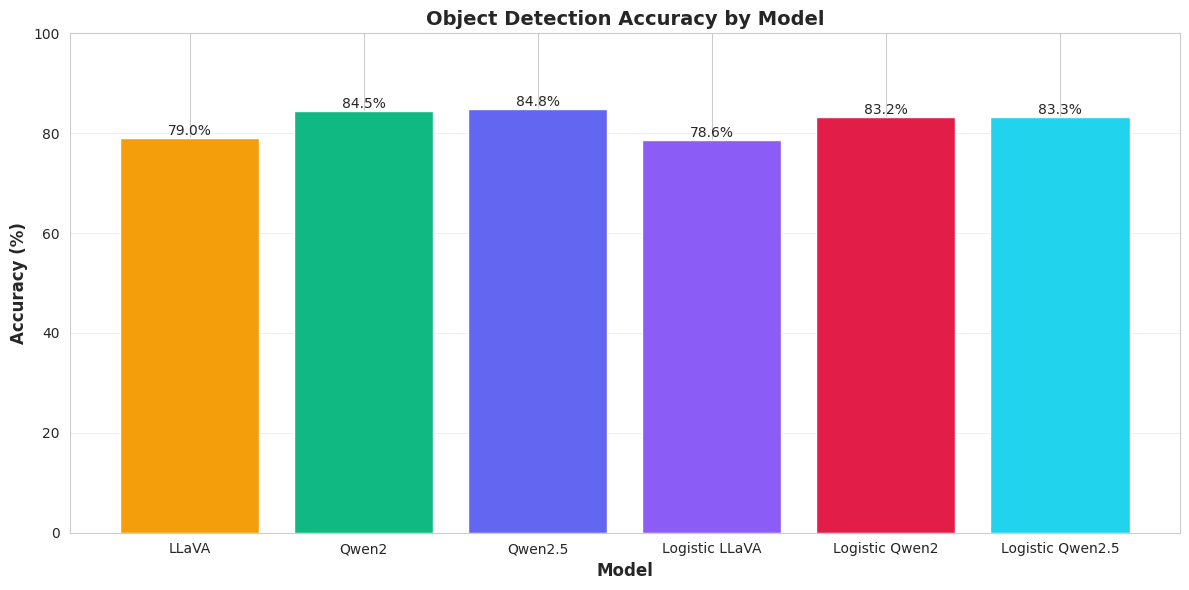

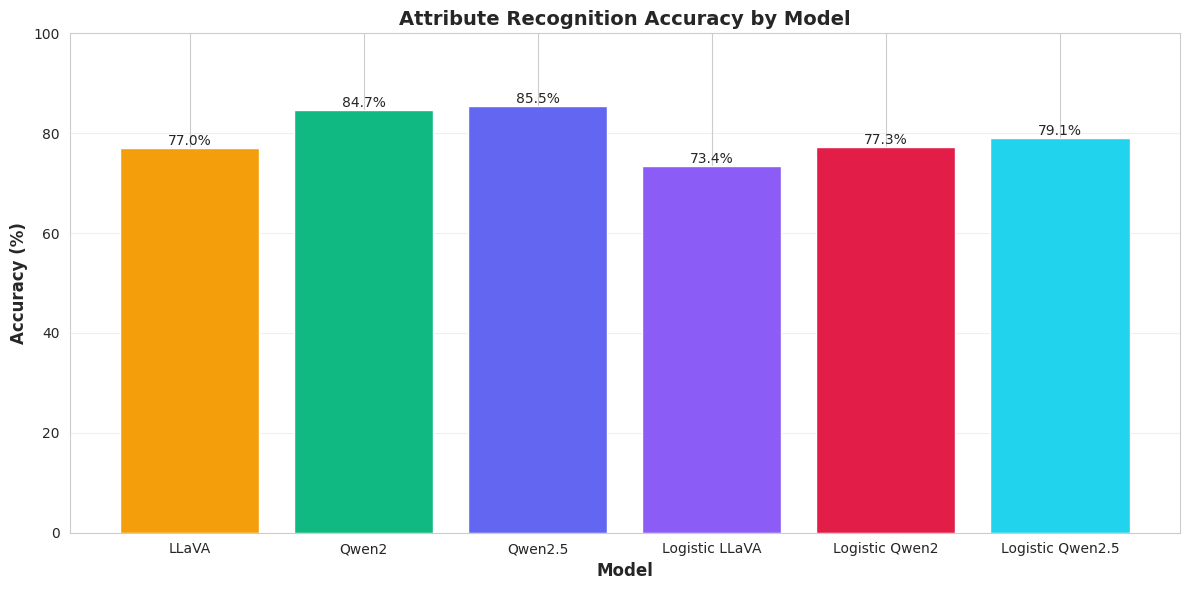

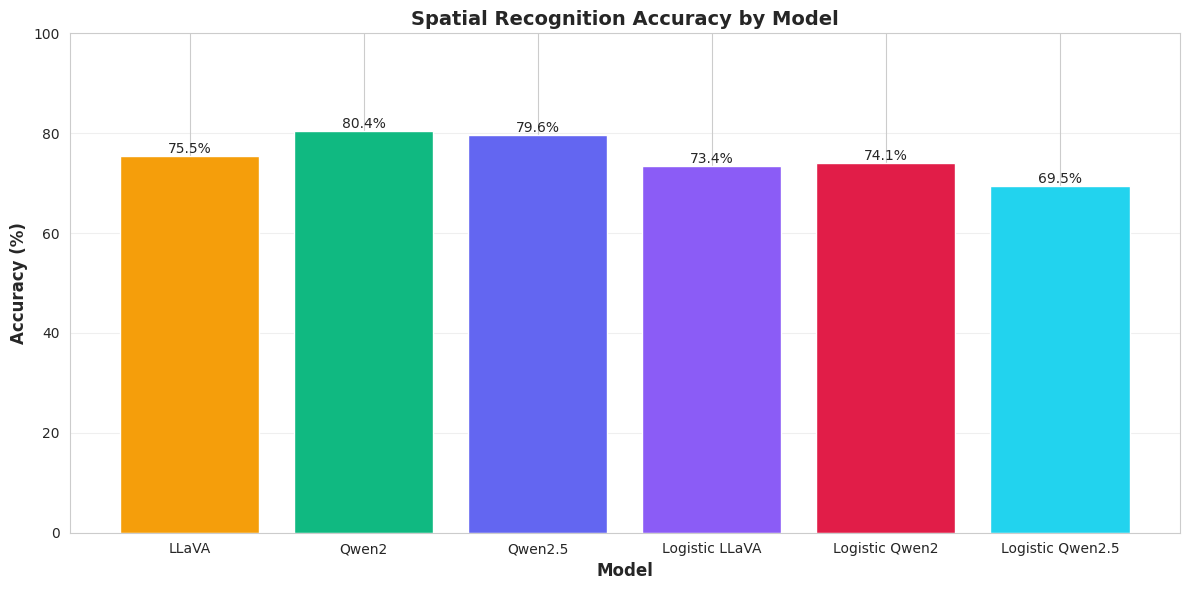

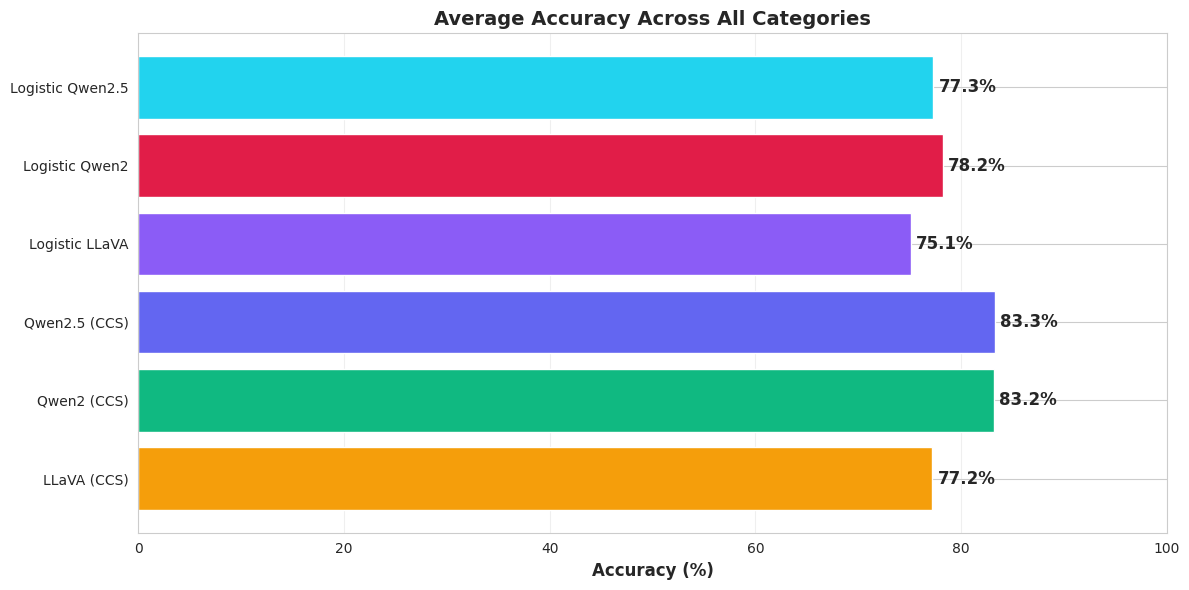

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Training loss data for CCS models (10 trials each)
object_detection_loss = {
    'llava': [0.000870, 0.001189, 0.000930, 0.001145, 0.001945, 0.001364, 0.001339, 0.000959, 0.001259, 0.001249],
    'qwen2': [0.000730, 0.000822, 0.000669, 0.000563, 0.000501, 0.000767, 0.000594, 0.000721, 0.000859, 0.000744],
    'qwen2.5': [0.000699, 0.000698, 0.000645, 0.000769, 0.000729, 0.000767, 0.000664, 0.000658, 0.000670, 0.000438]
}

attribute_recognition_loss = {
    'llava': [0.006287, 0.005402, 0.006598, 0.005286, 0.006353, 0.008032, 0.006607, 0.006231, 0.005843, 0.006463],
    'qwen2': [0.004372, 0.003486, 0.004179, 0.003619, 0.003730, 0.004231, 0.003257, 0.004764, 0.004185, 0.004715],
    'qwen2.5': [0.004829, 0.005072, 0.002456, 0.005236, 0.004712, 0.003517, 0.002941, 0.004980, 0.005689, 0.005867]
}

spatial_recognition_loss = {
    'llava': [0.001677, 0.001346, 0.002143, 0.001893, 0.001935, 0.002284, 0.002975, 0.001574, 0.002096, 0.001778],
    'qwen2': [0.001152, 0.001451, 0.001440, 0.001256, 0.000941, 0.001308, 0.001329, 0.001310, 0.001230, 0.001571],
    'qwen2.5': [0.001303, 0.001452, 0.001069, 0.001542, 0.001071, 0.001612, 0.001348, 0.000917, 0.001572, 0.001419]
}

# Accuracy data - Order: LLaVA (CCS), Qwen2 (CCS), Qwen2.5 (CCS), Logistic LLaVA, Logistic Qwen2, Logistic Qwen2.5
accuracy_data = {
    'Object Detection': {
        'LLaVA': 79.0,
        'Qwen2': 84.5,
        'Qwen2.5': 84.8,
        'Logistic LLaVA': 78.6,
        'Logistic Qwen2': 83.2,
        'Logistic Qwen2.5': 83.3
    },
    'Attribute Recognition': {
        'LLaVA': 77.0,
        'Qwen2': 84.7,
        'Qwen2.5': 85.5,
        'Logistic LLaVA': 73.4,
        'Logistic Qwen2': 77.3,
        'Logistic Qwen2.5': 79.1
    },
    'Spatial Recognition': {
        'LLaVA': 75.5,
        'Qwen2': 80.4,
        'Qwen2.5': 79.6,
        'Logistic LLaVA': 73.4,
        'Logistic Qwen2': 74.1,
        'Logistic Qwen2.5': 69.5
    }
}

average_accuracy = {
    'LLaVA (CCS)': 77.2,
    'Qwen2 (CCS)': 83.2,
    'Qwen2.5 (CCS)': 83.3,
    'Logistic LLaVA': 75.1,
    'Logistic Qwen2': 78.2,
    'Logistic Qwen2.5': 77.3
}

trials = list(range(1, 11))

# ============================================================================
# CHART 1: Object Detection Loss
# ============================================================================
fig1, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(trials, object_detection_loss['llava'], marker='s', linewidth=2, label='LLaVA', color='#f59e0b', markersize=6)
ax1.plot(trials, object_detection_loss['qwen2'], marker='o', linewidth=2, label='Qwen2', color='#10b981', markersize=6)
ax1.plot(trials, object_detection_loss['qwen2.5'], marker='^', linewidth=2, label='Qwen2.5', color='#6366f1', markersize=6)

ax1.set_title('Object Detection - Training Loss (10 Random Restarts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Trial', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.text(0.02, 0.98, f"Best Loss - LLaVA: {min(object_detection_loss['llava']):.6f} | Qwen2: {min(object_detection_loss['qwen2']):.6f} | Qwen2.5: {min(object_detection_loss['qwen2.5']):.6f}", transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# CHART 2: Attribute Recognition Loss
# ============================================================================
fig2, ax2 = plt.subplots(figsize=(12, 6))

ax2.plot(trials, attribute_recognition_loss['llava'], marker='s', linewidth=2, label='LLaVA', color='#f59e0b', markersize=6)
ax2.plot(trials, attribute_recognition_loss['qwen2'], marker='o', linewidth=2, label='Qwen2', color='#10b981', markersize=6)
ax2.plot(trials, attribute_recognition_loss['qwen2.5'], marker='^', linewidth=2, label='Qwen2.5', color='#6366f1', markersize=6)

ax2.set_title('Attribute Recognition - Training Loss (10 Random Restarts)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Trial', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.text(0.02, 0.98, f"Best Loss - LLaVA: {min(attribute_recognition_loss['llava']):.6f} | Qwen2: {min(attribute_recognition_loss['qwen2']):.6f} | Qwen2.5: {min(attribute_recognition_loss['qwen2.5']):.6f}", transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# CHART 3: Spatial Recognition Loss
# ============================================================================
fig3, ax3 = plt.subplots(figsize=(12, 6))

ax3.plot(trials, spatial_recognition_loss['llava'], marker='s', linewidth=2, label='LLaVA', color='#f59e0b', markersize=6)
ax3.plot(trials, spatial_recognition_loss['qwen2'], marker='o', linewidth=2, label='Qwen2', color='#10b981', markersize=6)
ax3.plot(trials, spatial_recognition_loss['qwen2.5'], marker='^', linewidth=2, label='Qwen2.5', color='#6366f1', markersize=6)

ax3.set_title('Spatial Recognition - Training Loss (10 Random Restarts)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Trial', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12)
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.text(0.02, 0.98, f"Best Loss - LLaVA: {min(spatial_recognition_loss['llava']):.6f} | Qwen2: {min(spatial_recognition_loss['qwen2']):.6f} | Qwen2.5: {min(spatial_recognition_loss['qwen2.5']):.6f}", transform=ax3.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# CHART 4A: Accuracy - Object Detection
# ============================================================================
fig4a, ax4a = plt.subplots(figsize=(12, 6))
models = list(accuracy_data['Object Detection'].keys())
values = list(accuracy_data['Object Detection'].values())
colors = ['#f59e0b', '#10b981', '#6366f1', '#8b5cf6', '#e11d48', '#22d3ee', '#f472b6', '#a3e635', '#fbbf24']
bars = ax4a.bar(models, values, color=colors[:len(models)])
for i, bar in enumerate(bars):
    ax4a.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)
ax4a.set_xlabel('Model', fontsize=12, fontweight='bold')
ax4a.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax4a.set_title('Object Detection Accuracy by Model', fontsize=14, fontweight='bold')
ax4a.set_ylim(0, 100)
ax4a.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================================================
# CHART 4B: Accuracy - Attribute Recognition
# ============================================================================
fig4b, ax4b = plt.subplots(figsize=(12, 6))
models = list(accuracy_data['Attribute Recognition'].keys())
values = list(accuracy_data['Attribute Recognition'].values())
bars = ax4b.bar(models, values, color=colors[:len(models)])
for i, bar in enumerate(bars):
    ax4b.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)
ax4b.set_xlabel('Model', fontsize=12, fontweight='bold')
ax4b.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax4b.set_title('Attribute Recognition Accuracy by Model', fontsize=14, fontweight='bold')
ax4b.set_ylim(0, 100)
ax4b.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================================================
# CHART 4C: Accuracy - Spatial Recognition
# ============================================================================
fig4c, ax4c = plt.subplots(figsize=(12, 6))
models = list(accuracy_data['Spatial Recognition'].keys())
values = list(accuracy_data['Spatial Recognition'].values())
bars = ax4c.bar(models, values, color=colors[:len(models)])
for i, bar in enumerate(bars):
    ax4c.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)
ax4c.set_xlabel('Model', fontsize=12, fontweight='bold')
ax4c.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax4c.set_title('Spatial Recognition Accuracy by Model', fontsize=14, fontweight='bold')
ax4c.set_ylim(0, 100)
ax4c.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================================================
# CHART 5: Average Accuracy Comparison
# ============================================================================
fig5, ax5 = plt.subplots(figsize=(12, 6))

models_avg = list(average_accuracy.keys())
accuracies = list(average_accuracy.values())
colors_avg = colors[:len(models_avg)]

bars = ax5.barh(models_avg, accuracies, color=colors_avg)

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax5.text(acc + 0.5, i, f'{acc:.1f}%', va='center', fontsize=12, fontweight='bold')

ax5.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax5.set_title('Average Accuracy Across All Categories', fontsize=14, fontweight='bold')
ax5.set_xlim(0, 100)
ax5.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()
